<a href="https://colab.research.google.com/github/JoseFranUdea/Proyecto_Fundamentos_Deep_Learning/blob/main/01_Exploracion_de_datos.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Proyecto final, fundamentos de Deep learning, José Francisco Albarrán Carlillo
# Exploración de datos

# Módulos a utilizar

In [1]:
from tensorflow.keras.utils import to_categorical
import numpy as np
from glob import glob
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MultiLabelBinarizer
from skimage import exposure
import cv2 as cv
import os
import itertools
import seaborn as sns
import os
import multiprocessing as mproc
from keras.preprocessing import image
from tensorflow.keras.preprocessing import image
import os
from matplotlib.pyplot import figure

from tqdm import tqdm
%matplotlib inline

print("ejecutado")

ejecutado


**Verificar si se utiliza GPU**

In [2]:
import tensorflow as tf

gpucheck = tf.config.experimental.list_physical_devices('GPU')
for gpu in gpucheck:
    print("Name:", gpu.name, "  Type:", gpu.device_type)
tf.test.is_gpu_available()

Instructions for updating:
Use `tf.config.list_physical_devices('GPU')` instead.


False

**Se carga las direcciones de los archivos (importante para cada caso)**

In [3]:
train_dir ='/content/drive/MyDrive/archivos_plant/train_images2/'
test_dir = '/content/drive/MyDrive/archivos_plant/test_images/'      
df =pd.read_csv('/content/drive/MyDrive/archivos_plant/train.csv')



In [4]:
train_files = glob(train_dir + '/*.jpg')
print('# Archivos para entrenar',len(train_files))

# Archivos para entrenar 4125


**Clasificación del as imágenes**

scab                               4826
healthy                            4624
frog_eye_leaf_spot                 3181
rust                               1860
complex                            1602
powdery_mildew                     1184
scab frog_eye_leaf_spot             686
scab frog_eye_leaf_spot complex     200
frog_eye_leaf_spot complex          165
rust frog_eye_leaf_spot             120
rust complex                         97
powdery_mildew complex               87
Name: labels, dtype: int64


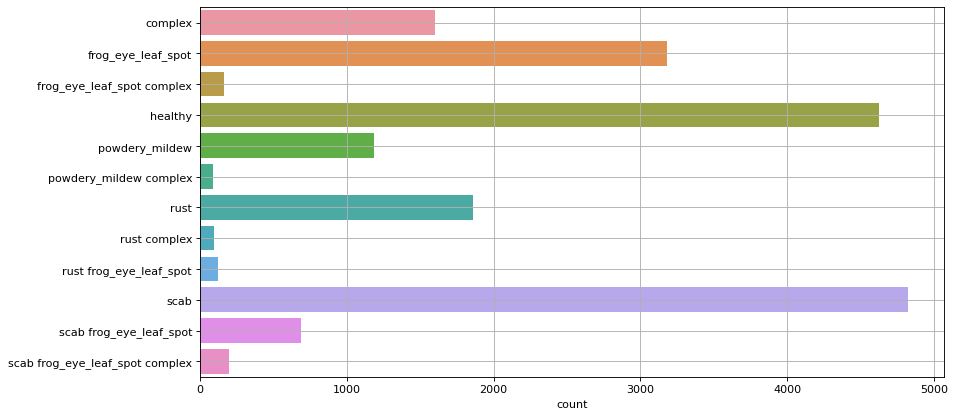

In [5]:
all_labels = list(itertools.chain([lbs for lbs in df['labels']]))
figure(figsize=(12, 6), dpi=80)

ax = sns.countplot(y=sorted(all_labels), orient='x')
ax.grid()

print(df.labels.value_counts())

**Se binarizan las etiquetas de las imagenes**

In [6]:
# converting labels to binary attributes
#Se crea una copia de train
train = df.copy()
#Se crea una lista de etiquetas para la copia de train
train['labels'] = df['labels'].apply(lambda string: string.split(' '))

#Transforma las etiquetas para en un formato binario
s = list(train['labels'])
mlb = MultiLabelBinarizer()

#crea el data frame trainx aplicando las transformaciones de s, los nombres de las columnas se
# se obtienen con mlb.classes, los indices se mantienen de la misma manera que los índices de train

trainx = pd.DataFrame(mlb.fit_transform(s), columns=mlb.classes_, index=train.index)
#agrega la columna de imagenes del dataframe de train a trainx
trainx['image'] = train['image']


#Se verifica coom estan los datos

print(trainx.head(10), trainx.columns)

   complex  frog_eye_leaf_spot  healthy  powdery_mildew  rust  scab  \
0        0                   0        1               0     0     0   
1        1                   1        0               0     0     1   
2        0                   0        0               0     0     1   
3        0                   0        0               0     0     1   
4        1                   0        0               0     0     0   
5        0                   0        1               0     0     0   
6        0                   0        0               0     1     0   
7        0                   0        1               0     0     0   
8        1                   0        0               0     0     0   
9        0                   0        1               0     0     0   

                  image  
0  800113bb65efe69e.jpg  
1  8002cb321f8bfcdf.jpg  
2  80070f7fb5e2ccaa.jpg  
3  80077517781fb94f.jpg  
4  800cbf0ff87721f8.jpg  
5  800edef467d27c15.jpg  
6  800f85dc5f407aef.jpg  
7  801d6dc

**Se crean copias de los archivos para no modificarlos originales**

In [7]:
#Parametros

TARGET_SIZE = 128
BATCH_SIZE = 64
EPOCHS = 1
DATA_LIMIT = 12000
trainx = trainx[:DATA_LIMIT] 

In [8]:
# Hacemos un data frame de las imágenes que extrajimos del archivo original

from tensorflow.keras.preprocessing import image
import os

train_image = []
trainxN = []
Y = []
direccion=[]

for i in tqdm(range(trainx.shape[0])):
    try:
        img_path = os.path.join(train_dir, trainx['image'][i])
        
        #Check if the image file exists
        if not os.path.isfile(img_path):
            continue
        trainxN.append(trainx.iloc[i])
        
        img = image.load_img(img_path, target_size=(TARGET_SIZE, TARGET_SIZE, 3))
        img = image.img_to_array(img)
        img = img / 255
        direccion.append(img_path)

        train_image.append(img)
        
        y = trainx.iloc[i].drop(['image'], axis=0)
        Y.append(y)

    except Exception as e:
        print(f"Error al procesar imagen {img_path}: {str(e)}")
        continue

X = np.array(train_image)  #Formato de imagen
Y = np.array(Y)
Y64 = Y.astype(np.int64)
trainxNdf = pd.DataFrame(trainxN)  #Formato de tabla

100%|██████████| 12000/12000 [09:51<00:00, 20.28it/s]  


In [9]:
len(trainxNdf) #misma cantidad de los archivos que extrajimos

4125

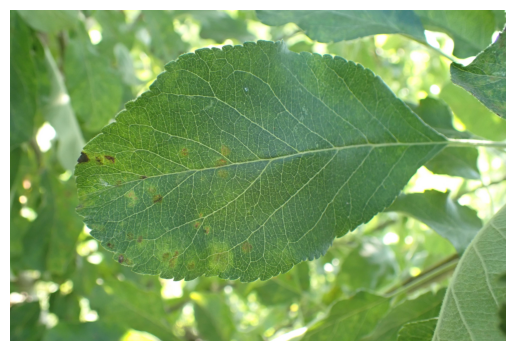

complex                                  0
frog_eye_leaf_spot                       0
healthy                                  0
powdery_mildew                           0
rust                                     0
scab                                     1
image                 a1a1d5a4cada586f.jpg
Name: 4155, dtype: object

In [15]:
import random
numero_aleatorio = random.randint(0,len(direccion)-1)
numero_aleatorio

nombre_imagen = os.path.basename(direccion[numero_aleatorio])
image = cv.imread(os.path.join(train_dir, nombre_imagen))
image = cv.cvtColor(image, cv.COLOR_BGR2RGB)
plt.imshow(image)
plt.axis("off")
plt.show()
trainxNdf.iloc[numero_aleatorio]
#Podemos mostrar la tabla donde se encuentra

**Guardado de variables**

In [16]:
#Los notebook tienen que estar en la misma dirección para poder cargar las variables

import pickle

# Guardar las variables en un archivo
with open('variables.pkl', 'wb') as f:
    pickle.dump((X,Y,Y64,trainxNdf,trainx,train_dir,test_dir,df,train_files,train_image,trainxN,direccion,TARGET_SIZE,BATCH_SIZE,EPOCHS,DATA_LIMIT), f)

print(os.getcwd())


/content


In [ ]:
from google.colab import drive
import shutil

# Montar Google Drive
drive.mount('/content/drive')

# Mover el archivo a Google Drive
shutil.move('variables.pkl', '/content/drive/MyDrive/variables.pkl')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
